In [22]:
!git clone https://github.com/Mohammed-Taher6705/jigsaw-puzzle-matching.git

fatal: destination path 'jigsaw-puzzle-matching' already exists and is not an empty directory.


In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
import zipfile
import os

zip_path = "/content/jigsaw-puzzle-matching/Task1_output.zip"
extract_path = "/content/output_Task1"


os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as z:
    z.extractall(extract_path)

print("Extracted to:", extract_path)
print("Contents:", os.listdir(extract_path))



Extracted to: /content/output_Task1
Contents: ['Task1_output']


In [25]:
!file /content/jigsaw-puzzle-matching/Task1_output.zip


/content/jigsaw-puzzle-matching/Task1_output.zip: Zip archive data, at least v2.0 to extract, compression method=store


In [26]:
import cv2
import numpy as np
import os
from glob import glob

# -------------------------------------------------------------
# Step 2: Edge Enhancement
# -------------------------------------------------------------

input_folder = "/content/output_Task1/Task1_output/content"
output_folder = "/content/output_Task2final"
os.makedirs(output_folder, exist_ok=True)


def enhance_edges(gray_img):
    """Apply CLAHE + Unsharp Mask and return final enhanced output."""

    # Step 1: Local contrast enhancement
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    clahe_img = clahe.apply(gray_img)

    # Step 2: Edge sharpening (Unsharp Mask)

    blur = cv2.GaussianBlur(clahe_img, (5,5), 1.5)

    alpha = 1.8  # sharpening strength
    img_sharp = cv2.addWeighted(clahe_img, 1 + alpha, blur, -alpha, 0)

    return img_sharp



image_paths = glob(os.path.join(input_folder, "**", "*.jpg"), recursive=True)
print(f"Enhancing {len(image_paths)} images...")


for img_path in image_paths:


    gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    # Apply enhancement
    enhanced_img = enhance_edges(gray)


    relative_path = os.path.relpath(img_path, input_folder)
    out_path = os.path.join(output_folder, relative_path)

    os.makedirs(os.path.dirname(out_path), exist_ok=True)


    cv2.imwrite(out_path, enhanced_img)


print("\nEnhanced images stored in:")
print(output_folder)


Enhancing 330 images...

Enhanced images stored in:
/content/output_Task2final


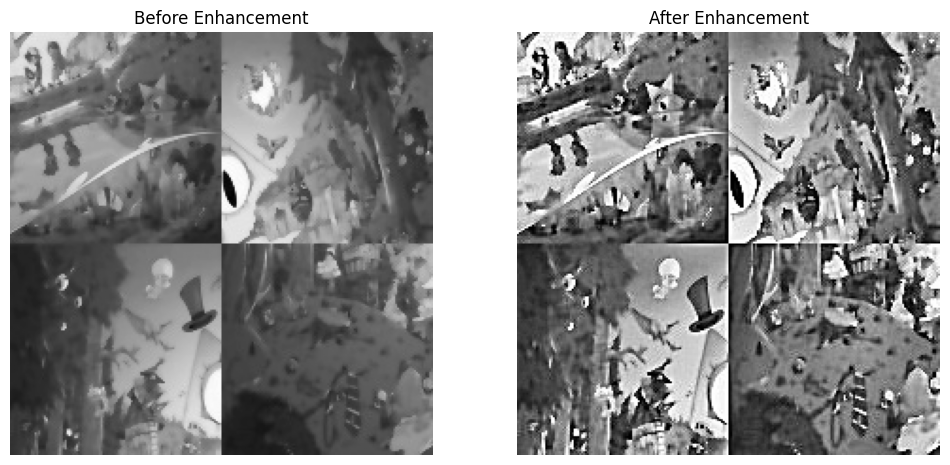

In [27]:
import cv2
import matplotlib.pyplot as plt


orig_path ="/content/output_Task1/Task1_output/content/puzzle_2x2/2.jpg"
enh_path  = "/content/output_Task2final/puzzle_2x2/2.jpg"


orig = cv2.imread(orig_path, cv2.IMREAD_GRAYSCALE)
enh  = cv2.imread(enh_path,  cv2.IMREAD_GRAYSCALE)


plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(orig, cmap='gray')
plt.title("Before Enhancement")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(enh, cmap='gray')
plt.title("After Enhancement")
plt.axis('off')

plt.show()






In [28]:
import numpy as np

orig_edges = cv2.Canny(orig, 50, 150)
enh_edges  = cv2.Canny(enh, 50, 150)

orig_count = np.sum(orig_edges > 0)
enh_count  = np.sum(enh_edges > 0)

print("Original Edge Pixels:", orig_count)
print("Enhanced Edge Pixels:", enh_count)


Original Edge Pixels: 7988
Enhanced Edge Pixels: 14267


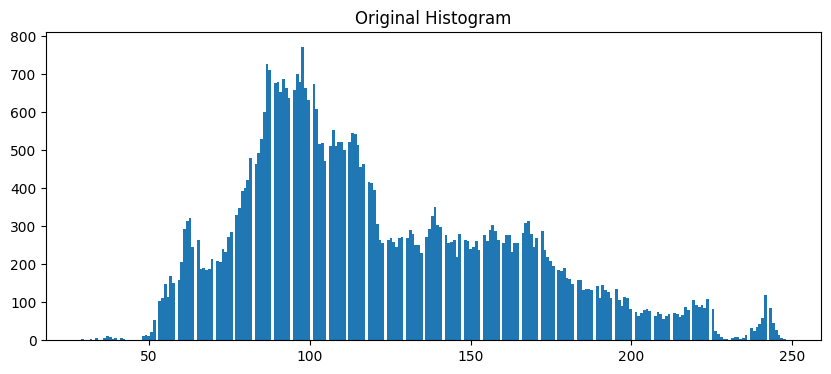

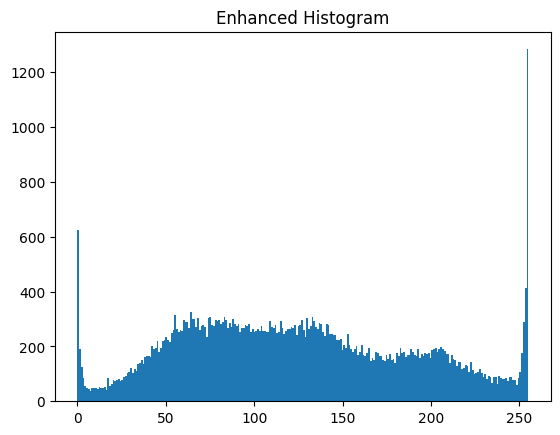

In [29]:
plt.figure(figsize=(10,4))

plt.hist(orig.ravel(), bins=256)
plt.title("Original Histogram")
plt.show()

plt.hist(enh.ravel(), bins=256)
plt.title("Enhanced Histogram")
plt.show()
